<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Univariate_Analysis_Exploratory_Data_Analysis_(Exercise_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Which was the most improved SAT subject from the year 2017 - 2018?

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset 1 url = http://bit.ly/SAT2017Dataset
# Dataset 2 url = http://bit.ly/SAT2018Dataset
# ---
#let us import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sat_2017=pd.read_csv('http://bit.ly/SAT2017Dataset')
sat_2018=pd.read_csv('http://bit.ly/SAT2018Dataset')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
#
print("The 2017 SAT data set has {} rows and {} columns".format(sat_2017.shape[0],sat_2017.shape[1]))

print("The 2018 SAT data set has {} rows and {} columns".format(sat_2018.shape[0],sat_2018.shape[1]))

The 2017 SAT data set has 51 rows and 5 columns
The 2018 SAT data set has 51 rows and 5 columns


In [3]:
# Previewing the top of our dataset
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [5]:
# Previewing the bottom of our dataset
sat_2017.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [6]:
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


In [7]:
# Checking whether each column has an appropriate datatype
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


The participation column is of object data type, however, we would like it to be of float data type to represent percentage.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

For validation, we checked out the data set in this website https://nces.ed.gov/programs/digest/d17/tables/dt17_226.40.asp  Our data can be regarded as valid based on the comparisons.

## 5. Tidying the Dataset

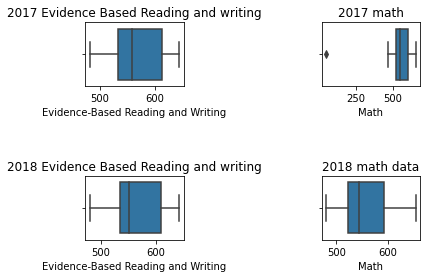

In [9]:
# Checking for Outliers
plt.subplot(3,3,1)
sns.boxplot(x=sat_2017['Evidence-Based Reading and Writing'])
plt.title('2017 Evidence Based Reading and writing')
plt.subplot(3,3,3)
sns.boxplot(x=sat_2017['Math'])
plt.title('2017 math')

plt.subplot(3,3,7)
sns.boxplot(x=sat_2018['Evidence-Based Reading and Writing'])
plt.title('2018 Evidence Based Reading and writing')
plt.subplot(3,3,9)
sns.boxplot(x=sat_2018['Math'])
plt.title('2018 math data')

plt.show()

In [10]:
# Checking for Anomalies
#let us check for duplicates
sat_2017.duplicated().sum()

0

In [11]:
#check for duplicates in 2018 data
sat_2018.duplicated().sum()

0

In [12]:
# Identifying the Missing Data
#check missing data in 2017 data
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [13]:
#check missing data in 2018 data
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [14]:
# Dealing with the Missing Data
#No missing data in 2017 and 2018 data sets

In [15]:
# More data cleaning procedures
#let us create a function to remove '%
def remove_perc(label):
  new_label=label.replace('%', '')
  return int(new_label)/100

In [16]:
#let us transform the participation column into a float
sat_2017['Participation']=sat_2017['Participation'].apply(lambda x: remove_perc(x))

sat_2018['Participation']=sat_2018['Participation'].apply(lambda x: remove_perc(x))

In [17]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [18]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [19]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


## 6. Exploratory Analysis

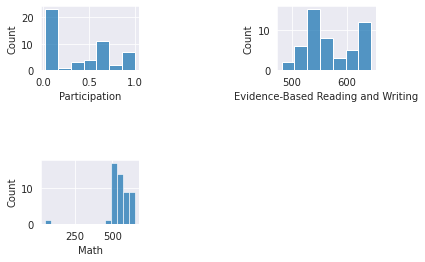

In [28]:
# Ploting the univariate summaries and recording our observations
sns.set_style('darkgrid')
plt.subplot(3,3,1)
sns.histplot(sat_2017.Participation)

plt.subplot(3,3,3)
sns.histplot(x=sat_2017['Evidence-Based Reading and Writing'])

plt.subplot(3,3,7)
sns.histplot(x=sat_2017.Math)


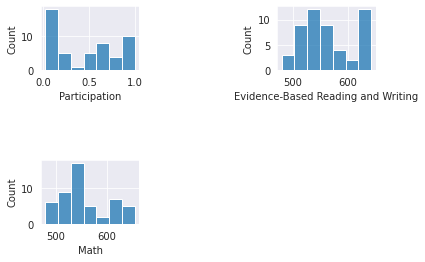

In [29]:
sns.set_style('darkgrid')
plt.subplot(3,3,1)
sns.histplot(sat_2018.Participation)

plt.subplot(3,3,3)
sns.histplot(x=sat_2018['Evidence-Based Reading and Writing'])

plt.subplot(3,3,7)
sns.histplot(x=sat_2018.Math)

In [30]:
sat_2017.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039
std,0.352766,45.666901,84.909119,92.494812
min,0.020000,482.000000,52.000000,950.000000
25%,0.040000,533.500000,522.000000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [31]:
sat_2018.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608
std,0.373143,47.502627,47.772623,94.155083
min,0.020000,480.000000,480.000000,977.000000
25%,0.045000,534.500000,522.500000,1057.500000
50%,0.520000,552.000000,544.000000,1098.000000
75%,0.775000,610.500000,593.500000,1204.000000
max,1.000000,643.000000,655.000000,1298.000000


## 7. Implementing the Solution

In [32]:
# Implementing the Solution
# we will use the difference in mean as the metric for our solution
math_improvement=sat_2018.Math.mean()-sat_2017.Math.mean()
ERW_improvement=sat_2018['Evidence-Based Reading and Writing'].mean()-sat_2017['Evidence-Based Reading and Writing'].mean()

In [33]:
math_improvement

8.607843137254918

In [34]:
ERW_improvement

-5.43137254901967

From above we can see that the Math subject performance improved by 8.60 on average in 2018 while the Evidence-Based Reading and Writing subject worsened by -5.431 on average in 2018

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [35]:
# Reviewing the Solution 
#We can see that in 2018, there was an increase in the participation of the SAT exams, this could have caused the increase in average of the 
#Math subject, in that the additional  no. of students in 2018 compared to 2017 were good in math and not so good in
#Evidence-Based Reading and Writing. Therefore instead of using the mean as the metric, we will use the median which is more robust.

In [36]:
math_improvement_2=sat_2018.Math.median()-sat_2017.Math.median()
ERW_improvement_2=sat_2018['Evidence-Based Reading and Writing'].median()-sat_2017['Evidence-Based Reading and Writing'].median()

In [37]:
math_improvement_2

-4.0

In [38]:
ERW_improvement_2

-7.0

Using the above metric(median), we can see that there was no improvement in 2018 in either subjects but still, it seems the Evidence-Based Reading and Writing did worse than Math relative to 2017


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?